# Question-1) #

## Find the line of the $wx + b$ that minimises the squared error for the following $1d$-regression problem: ##

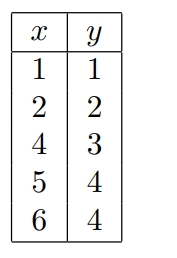

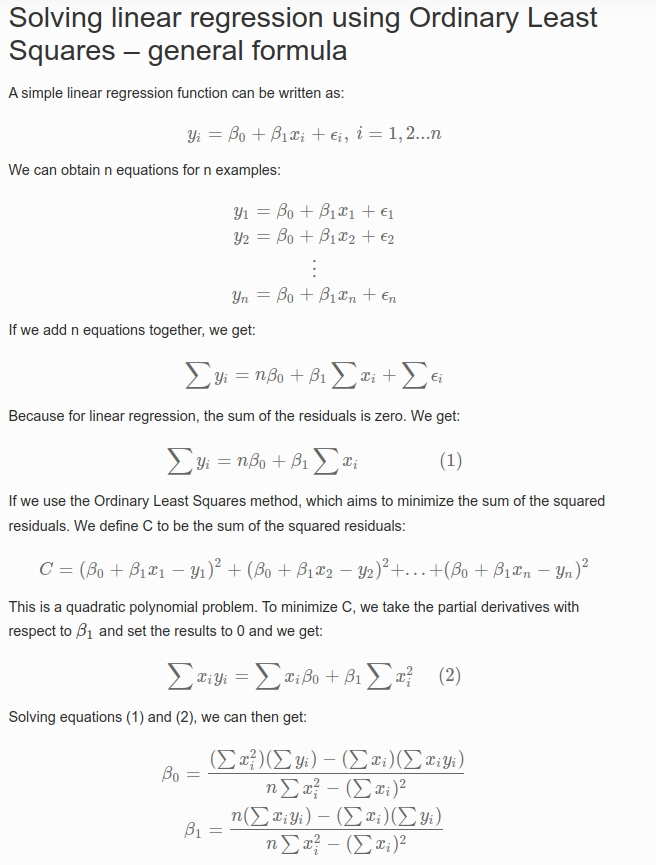

Coefficients for the Linear equation [slope, intercept]: 0.6162790697674418 0.5813953488372093


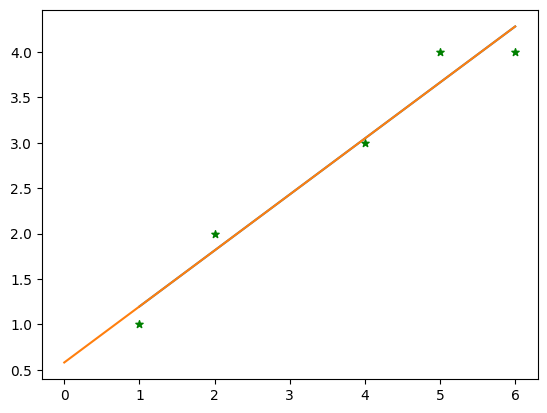

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = np.asarray([1, 2, 4, 5, 6])
Y = np.asarray([1, 2, 3, 4, 4])

n = len(X) #number of samples

slope = ((n * (np.sum(X * Y))) - (np.sum(X) * np.sum(Y))) /((n * np.sum(X * X)) - (np.sum(X) * np.sum(X)))
intercept = (((np.sum(X * X) * np.sum(Y))) - (np.sum(X) * np.sum(X * Y))) / ((n * np.sum(X * X)) - (np.sum(X) * np.sum(X)))

print("Coefficients for the Linear equation [slope, intercept]:", slope, intercept)
plt.scatter(X, Y, label= "stars", color= "green",
            marker= "*", s=30)
plt.plot(X, slope*X + intercept)
plt.plot(np.arange(7), slope*np.arange(7) + intercept)

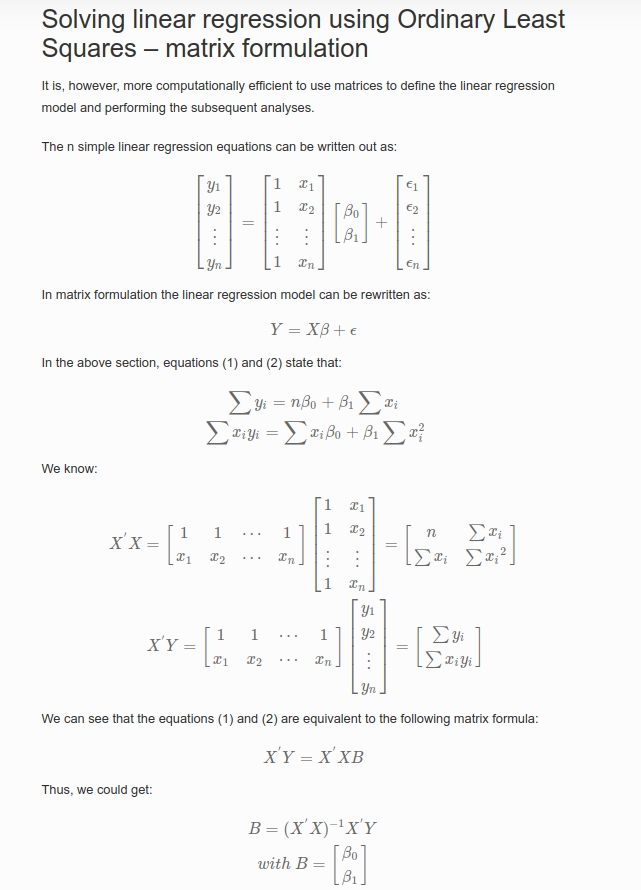

Coefficents for the linear equation [intercept, slope]: [0.58139535 0.61627907]


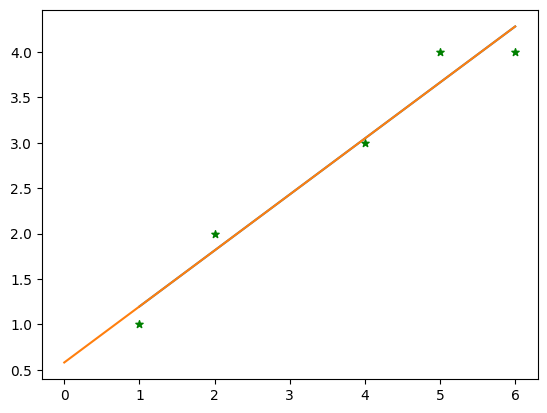

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = np.asarray([[1, 1], [1, 2], [1, 4],  [1, 5],  [1, 6]])
Y = np.asarray([1, 2, 3, 4, 4])

X_transpose = X.transpose()
Beta = np.linalg.inv((X_transpose @ X)) @ X_transpose @ Y

print("Coefficents for the linear equation [intercept, slope]:",Beta)

plt.scatter(X[:,1], Y, label= "stars", color= "green",
            marker= "*", s=30)
plt.plot(X[:,1], Beta[1]*X[:,1] + Beta[0])
plt.plot(np.arange(7), Beta[1]*np.arange(7) + Beta[0])

## Question-2)

Let $ \phi : \mathbb{R}^d \rightarrow \mathbb{R}^{d'} $ be the feature mapping for performing $k-$degree polynomial regression on a $d-$dimensional input. For example if $k = 2, d = 2$ then $\phi([x_1, x_2]) = [1, x_1, x_2, x_1^2, x_2^2, x_1x_2].$



1.  Give $\phi$ for $k = 2, d = 3$ \\
 $\phi([x_1, x_2, x_3]) = [1, x_1, x_2, x_3, x_1^2, x_2^2, x_3^2, x_1x_2, x_1x_3, x_2x_3].$
2.  Give $\phi$ for $k = 3, d = 2$ \\
$\phi([x_1, x_2]) = [1, x_1, x_2, x_1^2, x_2^2, x_1x_2, x_1^3, x_2^3, x_1^2x_2, x_2^2x_1].$
3.  Give $d'$ as a function of $d$ and $k$. Prove this




## Question-3)
Say we have a linear regression dataset where every training datapoint $\{x_n, y_n\}$ has a weight $q_n (q_n > 0)$ identified with it. Then we have the weighted error function (sum of squares) given by:

$$ E_q(w) =  \sum_{n=1}^{N} \frac{q_n(t_n - w^Tx_n)^2}{N} $$
           
Derive the closed-form solution for the minimizer $w^*$ of this function.




## Solution

$$ E_q(w) =  \sum_{n=1}^{N} \frac{q_n(t_n - w^Tx_n)^2}{N}$$

This equation is rewritten in matrix form where $Q$ for the matrix with the $q_n$ on the diagonal and zeroes everywhere else, $T$ contains $[t_1, t_2, ..., t_n]$, $X$ contains $[x_1, x_2, ..., x_n]$, and $W$ parameters for the weighted linear regression model, then
    
\begin{align}
    E_q(w) & = \frac{1}{N} (T-XW)^T Q (T-XW)\\
    & = \frac{1}{N} ( T^TQT - T^TQ^TXW - W^TX^TQT + W^TX^TQXW).
\end{align}
Since the $T^TQ^TXW$  is a scalar value, we can write this as  $W^TX^TQT$
\begin{align*}
    E_q(w) & = \frac{1}{N} ( T^TQT -  2* W^TX^TQT + W^TX^TQXW).
\end{align*}

Differentiating with respect to $W$, we get the gradient as,

\begin{align*}
    \nabla_W E_q(w) & = \frac{1}{N} (-2* X^TQT + 2X^TQXW).
\end{align*}

Setting this to zero at the optimum and solving

$$ w^*_{WLS} =  (X^TQX)^{-1}X^TQT$$


# Polynomial Regression Demo #



1.    Plot of the approximated functions obtained using training [datasets](https://drive.google.com/drive/folders/1zKsJ9Ek0EU3StTPpvQP-Nnd-zYOEfU9I?usp=sharing) of different sizes, for different model complexities, and for different values of regularization parameter. (Similar to Figures 1.4, 1.6, and 1.7 in Bishop’s book). You may try out polynomial basis functions up to 25 degrees for 1D data.
2.   Scatter plot with target output on the x-axis and model output on the y-axis for the best-performing model for training and development data.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


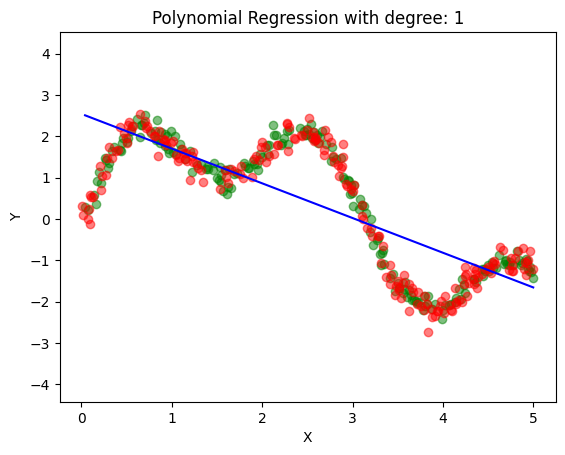

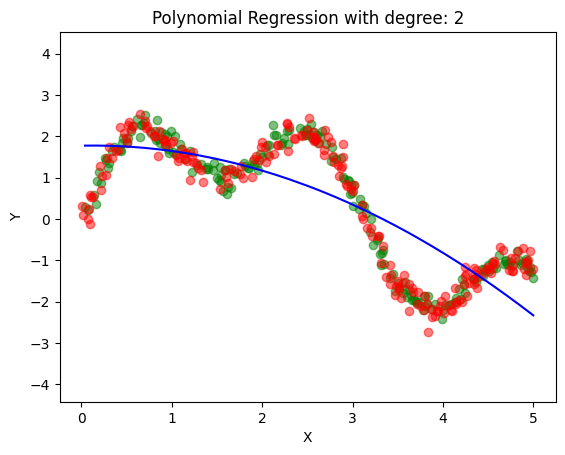

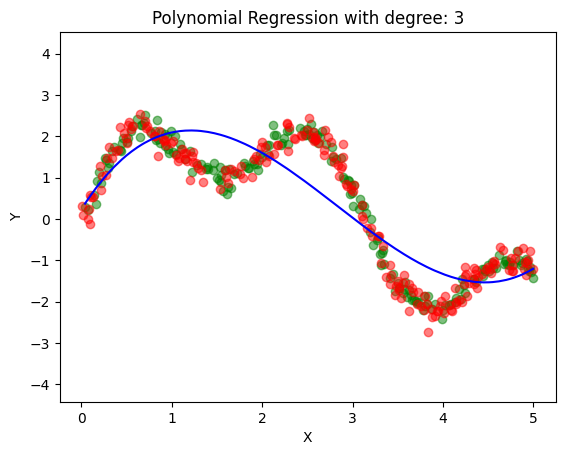

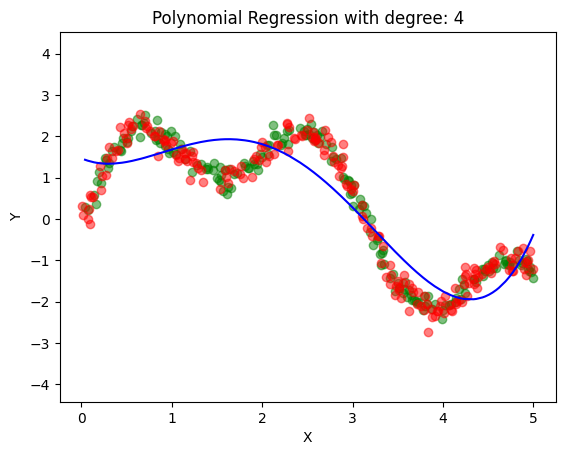

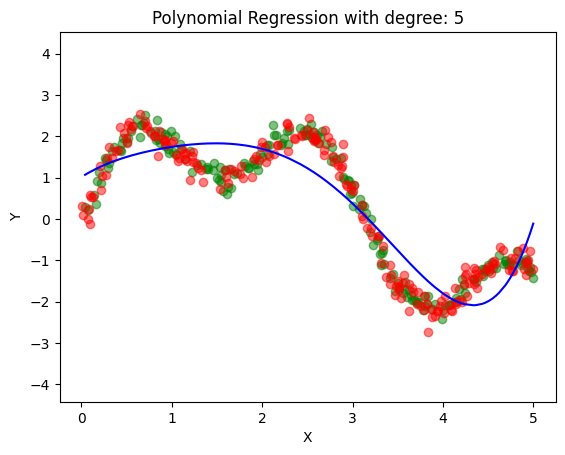

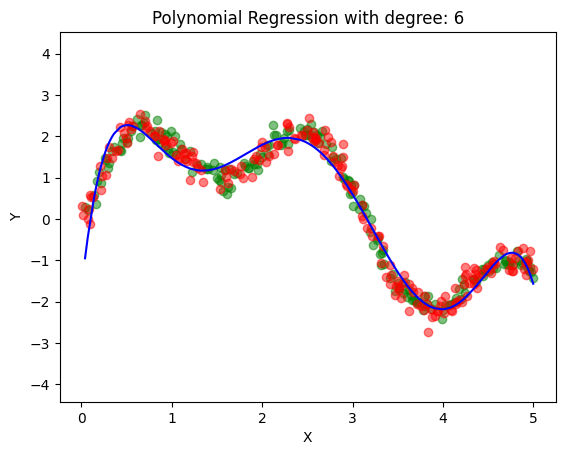

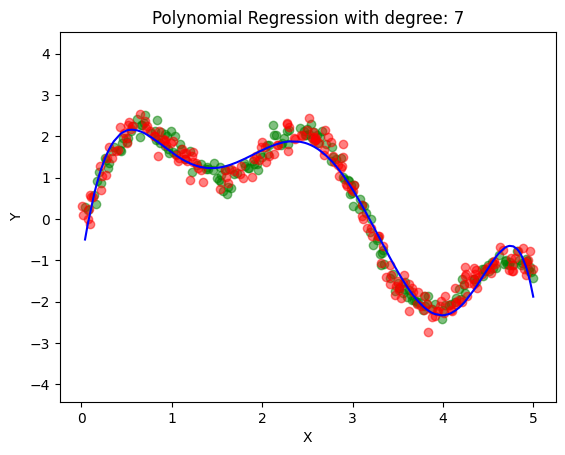

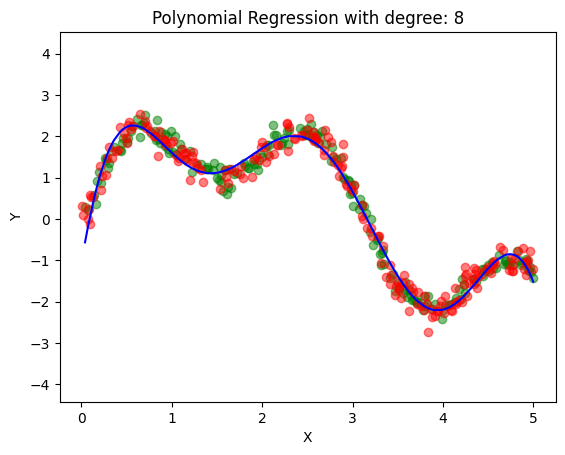

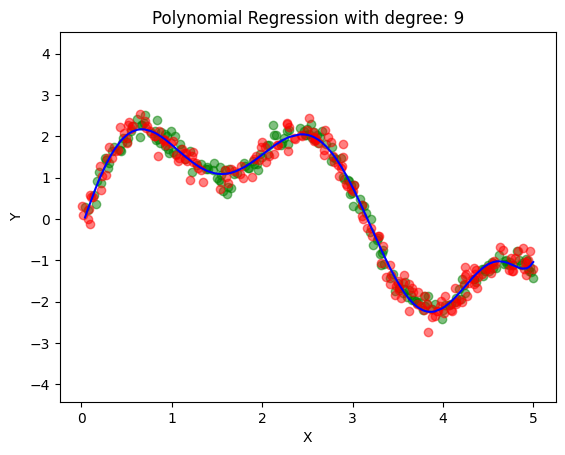

Text(0, 0.5, 'Error')

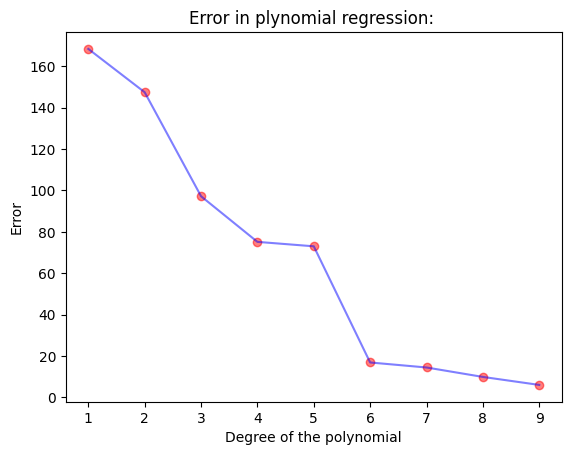

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

file_id = '17'
train_filename = '/content/drive/MyDrive/Colab Notebooks/Dataset/Data2/'+ file_id+'/1d_team_'+file_id+'_train.txt'
train_data = np.loadtxt(train_filename, dtype=float)
val_filename = '/content/drive/MyDrive/Colab Notebooks/Dataset/Data2/'+ file_id+'/1d_team_'+file_id+'_dev.txt'
val_data = np.loadtxt(val_filename, dtype=float)

train_X = train_data[:,0]
train_Y = train_data[:,1]
val_X = val_data[:,0]
val_Y = val_data[:,1]


design_matrix = []
total_error = []
index_error = 1
for max_degree in range(1, 10):
# max_degree = 9
  design_matrix = np.asarray([[np.power(train_X[i], j) for j in range(max_degree+1)] for i in range(len(train_X))])
  coefficients = np.linalg.pinv(np.transpose(design_matrix) @ design_matrix) @ (np.transpose(design_matrix))@ train_Y;

  Y_predict = design_matrix @ coefficients
  #### Finding Error for Least square method####
  error = (train_Y - Y_predict) * (train_Y - Y_predict)
  total_error.append(np.sum(error))


  plt.scatter(train_X, train_Y, color='green', alpha=0.5)
  plt.scatter(val_X, val_Y, color='red', alpha=0.5)
  plt.plot(train_X, Y_predict, color='blue')
  plt.ylim(min(train_Y)-2, max(train_Y)+2)
  plt.title('Polynomial Regression with degree: '+str(max_degree))
  plt.xlabel('X')
  plt.ylabel('Y')

  plt.show()

plt.scatter(np.arange(1, max_degree+1), total_error, color='red', alpha=0.5)
plt.plot(np.arange(1, max_degree+1), total_error, color='blue', alpha=0.5)

plt.title('Error in plynomial regression: ')
plt.xlabel('Degree of the polynomial')

plt.ylabel('Error')

##Ploynomial regreession with inbuit packages in python

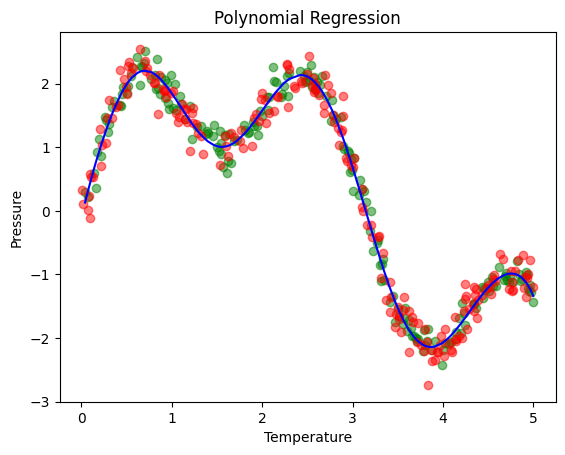

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

poly = PolynomialFeatures(degree=10)
train_data = train_X.reshape(-1, 1)
X_poly = poly.fit_transform(train_data)

poly.fit(X_poly, train_Y)
lin2 = LinearRegression()
lin2.fit(X_poly, train_Y)

# Visualising the Polynomial Regression results
plt.scatter(train_X, train_Y, color='green', alpha=0.5)
plt.scatter(val_X, val_Y, color='red', alpha=0.5)

plt.plot(train_X, lin2.predict(poly.fit_transform(train_data)),
         color='blue')
plt.title('Polynomial Regression')
plt.xlabel('Y')
plt.ylabel('X')

plt.show()